# 颱風資料庫與路徑繪製

## 前言

世界上颱風路徑資料 (Tropical Cyclone Best Tracks) 是由各個氣象作業單位所管理的，這些單位包含：
- **海軍聯合颱風預警中心 Joint Typhoon Warning Center (JTWC), Naval Oceanography Portal:** 擁有除北大西洋之外的所有洋盆之颱風路徑資料，包含西北太平洋、北印度洋、南半球等區域。 https://www.metoc.navy.mil/jtwc/jtwc.html?best-tracks
- **中國氣象局 China Meteorological Administration (CMA):** 擁有西北太平洋的颱風資料。 http://tcdata.typhoon.org.cn/en/zjljsjj_zlhq.html
- **日本氣象廳 RSMC Tokyo-Typhoon Center, Japan Meteorological Agency (JMA):** 擁有西北太平洋的颱風資料。 https://www.jma.go.jp/jma/jma-eng/jma-center/rsmc-hp-pub-eg/trackarchives.html
- **美國大氣海洋總署之國家颶風中心 National Hurricane Center (NHC), National Oceanic and Atmospheric Administration:** 擁有北大西洋和東太平洋的颱風資料，是JTWC所沒有的。 https://www.nhc.noaa.gov/data/#hurdat
- **世界氣象資料中心之全球颱風最佳路徑分析資料 International Best Track Archive for Climate Stewardship (IBTrACS):** 將世界上所有作業單位之颱風路徑資料統合、整理，得到的全球颱風路徑資料。 https://www.ncdc.noaa.gov/ibtracs/

然而，每一家作業單位整理颱風路徑的資料規格都有所不同，因此`besttracks`這個套件就是希望發展一套介面，將作業單位的颱風資料讀入整理成一個固定的格式，方便大家取用。這個資料格式就是我們在第十單元所介紹的pandas。接下來會教讀者如何安裝和使用這個套件來分析颱風資料。

## 安裝套件

如果電腦有git套件，可以直接利用以下指令將套件下載到資料夾。
```
git clone https://github.com/miniufo/besttracks.git
```
或是進入套件的網頁 (https://github.com/miniufo/besttracks) ，點選Code按鈕，選擇下載為Zip壓縮檔。解壓縮後，把其中的`besttracks/`這個資料夾移出來 (包含__init__.py、core.py、io.py、utils.py等檔案)，放在欲執行的程式的目錄下。


## 讀取資料

我們以JMA資料為例。

In [1]:
from besttracks import parse_TCs

# parse dataset from JMA
TCs = parse_TCs('data/jma_bst_all.txt',
                agency='JMA')
tcs = TCs[:]
tcs


[TC (ID=195101, name=NONAME, year=1951, fcstTime=0, unit=knot)
                  TIME        LAT         LON    TYPE     PRS     WND
 0 1951-02-19 06:00:00  20.000000  138.500000      TD  1010.0 -9999.0
 1 1951-02-19 12:00:00  20.000000  138.500000      TD  1010.0 -9999.0
 2 1951-02-19 18:00:00  23.000000  142.100006      TD  1000.0 -9999.0
 3 1951-02-20 00:00:00  25.000000  146.000000  OTHERS   994.0 -9999.0
 4 1951-02-20 06:00:00  27.600000  150.600006  OTHERS   994.0 -9999.0
 5 1951-02-20 12:00:00  28.900000  153.300003  OTHERS   994.0 -9999.0
 6 1951-02-20 18:00:00  31.299999  157.500000  OTHERS   992.0 -9999.0
 7 1951-02-21 00:00:00  32.599998  162.100006  OTHERS   990.0 -9999.0
 8 1951-02-21 06:00:00  33.900002  166.000000      EC   990.0 -9999.0
 9 1951-02-21 12:00:00  36.000000  170.000000      EC   990.0 -9999.0,
 TC (ID=195102, name=GEORGIA, year=1951, fcstTime=0, unit=knot)
                   TIME   LAT         LON    TYPE     PRS     WND
 0  1951-03-18 06:00:00   5.7  158.3

接下來我們簡介`tcs`的結構，這個變數是由一個list組成的，這個list中每個元素都是一個pandas.DataFrame，且每個DataFrame都有一些控制項，例如編號(`ID`)、命名(`name`)、年份(`year`)等。在`parse_TCs`這個函數中，可以利用以上的這些參數來調整所選取的颱風的範圍，例如：

In [2]:
TCs = parse_TCs('data/jma_bst_all.txt',
                    tc_cond= lambda tc:tc.year==2017,
                    agency='JMA')

tcs = TCs[:]

這樣就可以只選擇2017年的所有颱風。

## 資料過濾及繪圖

**Example 1:** 選取並繪製2017年12月所有颱風路徑資料。

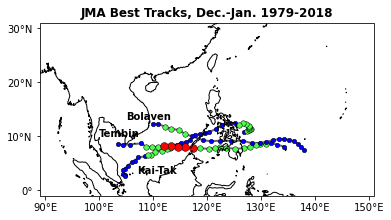

<Figure size 576x360 with 0 Axes>

In [3]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 150

lon1 = 89
lon2 = 151
lats = -1
latn = 31

proj = ccrs.PlateCarree()
fig,ax=plt.subplots(1,1,subplot_kw={'projection':proj})
plt.figure(figsize=[8,5])
ax.set_xlim(lon1,lon2)
ax.set_ylim(lats,latn)
ax.coastlines()
ax.set_xticks(np.arange(90,160,10))
ax.set_yticks(np.arange(0,40,10))   # 設定x, y座標的範圍，以及多少經緯度繪製刻度。
lon_formatter = LONGITUDE_FORMATTER
lat_formatter = LATITUDE_FORMATTER
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)  # 將經緯度以degN, degE的方式表示。

for i in range(0,len(tcs)):
    tc = TCs[i]  # List中的所有颱風，一個一個去挑選
    tc_mask = tc['TIME'].dt.month.isin([12])
    if (tc_mask.any()):
        if (tc['TIME'].dt.year.isin([2017]).any()):
            tc_plot = tc.plot_track(ax=ax, linewidth=2,
                                    trackonly=False,
                                    xlim=(lon1,lon2), ylim=(lats,latn))

ax.text(x=107, y=3 , s='Kai-Tak', size='medium',color='black',fontweight='bold')
ax.text(x=100, y=10, s='Tembin',  size='medium',color='black',fontweight='bold')
ax.text(x=105, y=13, s='Bolaven', size='medium',color='black',fontweight='bold')

ax.get_legend().remove()
ax.set_title('JMA Best Tracks, Dec.-Jan. 1979-2018',fontweight='bold')
plt.show()



以上的程式碼，有幾點特別說明：
1. `tc['TIME']`由於是DatetimeIndex，所以可以利用第四單元時間條件控制的方式來過濾所需要的時間。同理，也可以用`tc['LAT']`和`tc['LON']`來過濾空間範圍。
2. 上圖中，各路徑的時間點不同的顏色代表強度，藍色代表TD，綠色代表TS，紅色代表颱風。如果只想要畫路徑，`trackonly=True`。

更多的範例可以參考 https://github.com/miniufo/besttracks/blob/master/notebooks/QuickGuide.ipynb 。